# Projetinho 1 TA - Análise e Limpeza de Dados
**Escrito por:** Letícia Agudo Falconer

Esse projeto tem como objetivo colocar em prática os conceitos vistos no Turing Academy até o momento, utilizando o dataset apresentado a seguir para encontrar possíveis padrões entre os ganhadores de medalhas das edições passadas das Olimpíadas.


##Importação das Bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

##Sobre o Dataset:


O dataset que será utilizado traz informações à respeito dos atletas que participaram dos jogos olimpicos passados

**Colunas:**
1. **Athlete_ID** - Um número de identificação único de cada atleta
2. **Name** - Nome do atleta
3. **Sex** - Gênero do atleta: M (masculino) ou F (feminino)
4. **Age** - Idade
5. **Height** - Altura em centímetros
6. **Weight** - Peso em kg
7. **Team** - Nome do time ao qual o atleta pertence
8. **NOC** - Nome do comitê olímpico nacional ao qual o atleta pertence, sempre
será um código de 3 letras (BRA para Brasil, USA para Estados Unidos, etc.)
9. **Games** - Ano e época dos jogos
10. **Year** - Ano da edição que o atleta participou
11. **Season** - Estação na qual ocorreu os jogos Summer (verão) ou Winter (inverno) 
12. **City** - Cidade onde ocorreu a edição dos jogos
13. **Sport** - Esporte do atleta
14. **Event** - Especificação a respeito da categoria do esporte (Ex. Futebol
masculino, vôlei feminino, corrida 500m, etc.)
15. **Medal** - Medalha ganha pelo atleta: Gold (ouro), Silver (prata), Bronze, ou NA
(nenhuma medalha)

Em primeiro lugar, vamos importá-lo e definir a coluna "ID" como index do dataset.

In [2]:
jogos = pd.read_csv("df_athlete_events.csv") 
jogos.set_index("Athlete_ID", inplace=True)

Usando as funções .head() e .info(), vamos realizar algumas observações iniciais

In [3]:
jogos.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Athlete_ID,,,,,,,,,,,,,,
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [4]:
jogos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45567 entries, 4 to 135563
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    45567 non-null  object 
 1   Sex     45567 non-null  object 
 2   Age     44594 non-null  float64
 3   Height  35547 non-null  float64
 4   Weight  34926 non-null  object 
 5   Team    45567 non-null  object 
 6   NOC     45567 non-null  object 
 7   Games   45567 non-null  object 
 8   Year    45567 non-null  int64  
 9   Season  45567 non-null  object 
 10  City    45567 non-null  object 
 11  Sport   45567 non-null  object 
 12  Event   45567 non-null  object 
 13  Medal   39804 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 5.2+ MB


- São 45567 entradas no total, havendo muitos dados faltantes em diversas colunas
- A maioria de nossos dados são categóricos (Dtype = object). Assim, é necessário checar se todos estes estão no formato correto, mas vamos analizar isso na próxima etapa do projeto.

#Limpeza dos dados

##Dados Categóricos

Primeiro vamos utilizar o método .describe().

In [5]:
jogos.describe(include=["object"])

,Name,Sex,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,34926,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,188,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,70.0,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,1443,5515,5957,2321,38607,4091,4811,1379,13320


A princípio, podemos concluir que:
- Temos um número maior de IDs do que de "Name", mas isso não será importante na análise desse dataset
- Weight deveria ser do data type float;
- As colunas Sex e Season deveriam possuir apenas 2 classificações diferentes.
- Devemos checar as categorias dos outros dados



###Coluna "Sex":

Observando os diferentes dados de cada categoria:

In [6]:
print(jogos["Sex"].unique())

['M' 'MALE' 'FEMALE' 'F' 'Vic vai te dar um socao' 'P&D >> Comunidade']


Podemos perceber que "MALE" deveria ser tratado como "M", assim como "FEMALE" deveria ser apenas "F". Além disso, 'Vic vai te dar um socao' e 'P&D >> Comunidade' não deveriam estar nessa coluna. 

Para os dados "M" e "F":

In [7]:
# Substituindo "MALE" por "M".
jogos["Sex"].replace("MALE", "M", inplace=True)

# Substituindo "FEMALE" por "F".
jogos["Sex"].replace("FEMALE", "F", inplace=True)

# Olhando novamente os dados.
print(jogos["Sex"].unique())

['M' 'F' 'Vic vai te dar um socao' 'P&D >> Comunidade']


Para decidir o que faremos com 'Vic vai te dar um socao' e 'P&D >> Comunidade', vamos ver quantos desses dados existem:

In [8]:
print("Número de 'Vic vai te dar um socao': ", len(jogos[jogos['Sex'] == 'Vic vai te dar um socao']))
print("Número de 'P&D >> Comunidade': ", len(jogos[jogos['Sex'] == 'P&D >> Comunidade']))

Número de 'Vic vai te dar um socao':  312
Número de 'P&D >> Comunidade':  333


Temos duas opções: deletar estes dados, ou substituí-los pela moda. Como a quantidade de dados é pequena em comparação com a total, vamos neste caso optar pela exclusão.

In [9]:
Vic = jogos[jogos["Sex"] == 'Vic vai te dar um socao'].index
jogos.drop(Vic, inplace=True)

comunas = jogos[jogos["Sex"] == 'P&D >> Comunidade'].index
jogos.drop(comunas, inplace=True)

# Olhando novamente os dados.
print(jogos["Sex"].unique())

['M' 'F']


### Coluna "Season":

In [10]:
print(jogos["Season"].unique())

['Summer' 'Winter' '#ForaBolsonaro' 'Ele não' 'Ele nunca']


Como essa categoria deveria se tratar apenas de "Summer" e "Winter", vamos ver a quantidade dos dados diferentes, para decidir o que faremos:



In [11]:
print("Número de '#ForaBolsonaro': ", len(jogos[jogos['Season'] == '#ForaBolsonaro']))
print("Número de 'Ele não': ", len(jogos[jogos['Season'] == 'Ele não']))
print("Número de 'Ele nunca': ", len(jogos[jogos['Season'] == 'Ele nunca']))

Número de '#ForaBolsonaro':  70
Número de 'Ele não':  49
Número de 'Ele nunca':  28


Como temos quantidades pequenas de dados, vamos simplesmente deletá-las.

In [12]:
fora = jogos[jogos["Season"] == '#ForaBolsonaro'].index
jogos.drop(fora, inplace=True)

nao = jogos[jogos["Season"] == 'Ele não'].index
jogos.drop(nao, inplace=True)

nunca = jogos[jogos["Season"] == 'Ele nunca'].index
jogos.drop(nunca, inplace=True)

# Olhando novamente os dados.
print(jogos["Season"].unique())

['Summer' 'Winter']


###Coluna "Weight":

Iremos transformar essa coluna em um float.

In [13]:
jogos["Weight"].unique()

array([nan, '75.0', '85.0', '64.0', '90.0', '87.0', '49.0', 'hsuahusahu',
       '76.0', '83.0', '86.0', '82.0', '55.0', '67.0', '60.0', '79.0',
       '96.0', '97.0', '70.0', '88.0', '56.0', '80.0', '59.0', '91.0',
       '72.0', '62.0', '63.0', '130.0', '104.0', '73.0', '84.0', '125.0',
       '50.0', '102.0', '48.0', '58.0', '78.0', '40.0', '68.0', '92.0',
       '61.0', '95.0', '89.0', '65.0', '93.0', '77.0', '46.0', '81.0',
       '52.0', '54.0', '57.0', '69.0', '99.0', '69.5', '51.0', '120.0',
       '74.0', '110.0', '100.0', '66.0', '47.0', '116.0', '107.0', '53.0',
       '105.0', '109.0', '156.0', '71.0', '98.0', '160.0', '106.0',
       '146.0', '44.0', '138.0', '141.0', '94.0', '118.0', '101.0',
       '39.0', '32.0', '112.0', '115.0', '74.5', '121.0', '135.0',
       '111.0', '43.0', '36.0', '67.5', '45.0', '114.0', '132.0', '65.5',
       '42.0', '59.5', '127.5', '108.0', '35.0', '117.0', '103.0', '58.5',
       '214.0', '113.0', '146.5', '116.5', '140.0', '38.0', '101.5',

Podemos perceber que o único dado que não se trata de um float é o 'hsuahusahu', a seguir veremos quantos desse dado existem e lidaremos com o mesmo.

In [14]:
len(jogos[jogos["Weight"] == 'hsuahusahu'])

460

In [15]:
# Substituindo 'hsuahusahu' pela moda.
jogos["Weight"].replace('hsuahusahu', jogos['Weight'].mode()[0], inplace=True)

In [16]:
# Transformando em um float.
jogos["Weight"] = jogos["Weight"].astype(float)

### Coluna "Medal":

In [17]:
jogos["Medal"].unique()

array(['Gold', nan, 'Bronze', 'Silver', 'Nelson'], dtype=object)

Podemos perceber que "Nelson" não faz parte dessa categoria. 

In [18]:
len(jogos[jogos["Medal"] == "Nelson"])

161

Assim como os outros dados que tratamos, vamos excluir o "Nelson", já que sua quantidade não é relevante

In [19]:
fora = jogos[jogos["Medal"] == 'Nelson'].index
jogos.drop(fora, inplace=True)

# Olhando novamente os dados.
print(jogos["Medal"].unique())

['Gold' nan 'Bronze' 'Silver']


###Arrumando a coluna "City"

In [20]:
print(jogos["City"].unique())

['Paris' 'Albertville' 'Antwerpen' 'Sochi' 'London' 'Helsinki'
 'Lillehammer' 'Salt Lake City' 'Torino' 'Beijing' 'Seoul' 'Atlanta'
 'Oslo' 'Squaw Valley' 'Stockholm' 'Melbourne' 'Rio de Janeiro' 'Sydney'
 'Athina' 'Moskva' 'Los Angeles' 'Barcelona' 'Berlin' 'Tokyo' 'Roma'
 'Munich' 'Chamonix' 'St. Louis' 'Sankt Moritz' 'Calgary' 'Grenoble'
 'Montreal' 'Nagano' 'Vancouver' 'Amsterdam' 'Mexico City' 'Sapporo'
 'Lake Placid' 'Sarajevo' 'Garmisch-Partenkirchen' "Cortina d'Ampezzo"
 'Innsbruck' '######']


Para facilitar a leitura, iremos transformar a cidade categorizada como "######" para um dado do tipo NaN.

In [21]:
jogos["City"].replace("######", np.nan, inplace = True)

# Olhando novamente os dados.
print(jogos["City"].unique())

['Paris' 'Albertville' 'Antwerpen' 'Sochi' 'London' 'Helsinki'
 'Lillehammer' 'Salt Lake City' 'Torino' 'Beijing' 'Seoul' 'Atlanta'
 'Oslo' 'Squaw Valley' 'Stockholm' 'Melbourne' 'Rio de Janeiro' 'Sydney'
 'Athina' 'Moskva' 'Los Angeles' 'Barcelona' 'Berlin' 'Tokyo' 'Roma'
 'Munich' 'Chamonix' 'St. Louis' 'Sankt Moritz' 'Calgary' 'Grenoble'
 'Montreal' 'Nagano' 'Vancouver' 'Amsterdam' 'Mexico City' 'Sapporo'
 'Lake Placid' 'Sarajevo' 'Garmisch-Partenkirchen' "Cortina d'Ampezzo"
 'Innsbruck' nan]


##Dados Numéricos

O método describe() nos dá uma visão geral, e olhando para os valores de mínimo e máximo de cada dado, já podemos tirar algumas conclusões.

In [22]:
jogos.describe()

,Age,Height,Weight,Year
count,42715.000000,3.389400e+04,33299.000000,43681.000000
mean,25.872457,9.565149e+02,73.700256,1971.864243
std,5.969756,3.379120e+04,14.905732,95.099006
min,10.000000,1.320000e+02,28.000000,-2992.000000
25%,22.000000,1.700000e+02,63.000000,1952.000000
50%,25.000000,1.780000e+02,72.000000,1984.000000
75%,29.000000,1.850000e+02,82.000000,2002.000000
max,73.000000,1.976779e+06,214.000000,2016.000000


###Coluna "Year":

Plotando um gráfico com os anos que apareceram no dataset e suas respectivas quantidades:

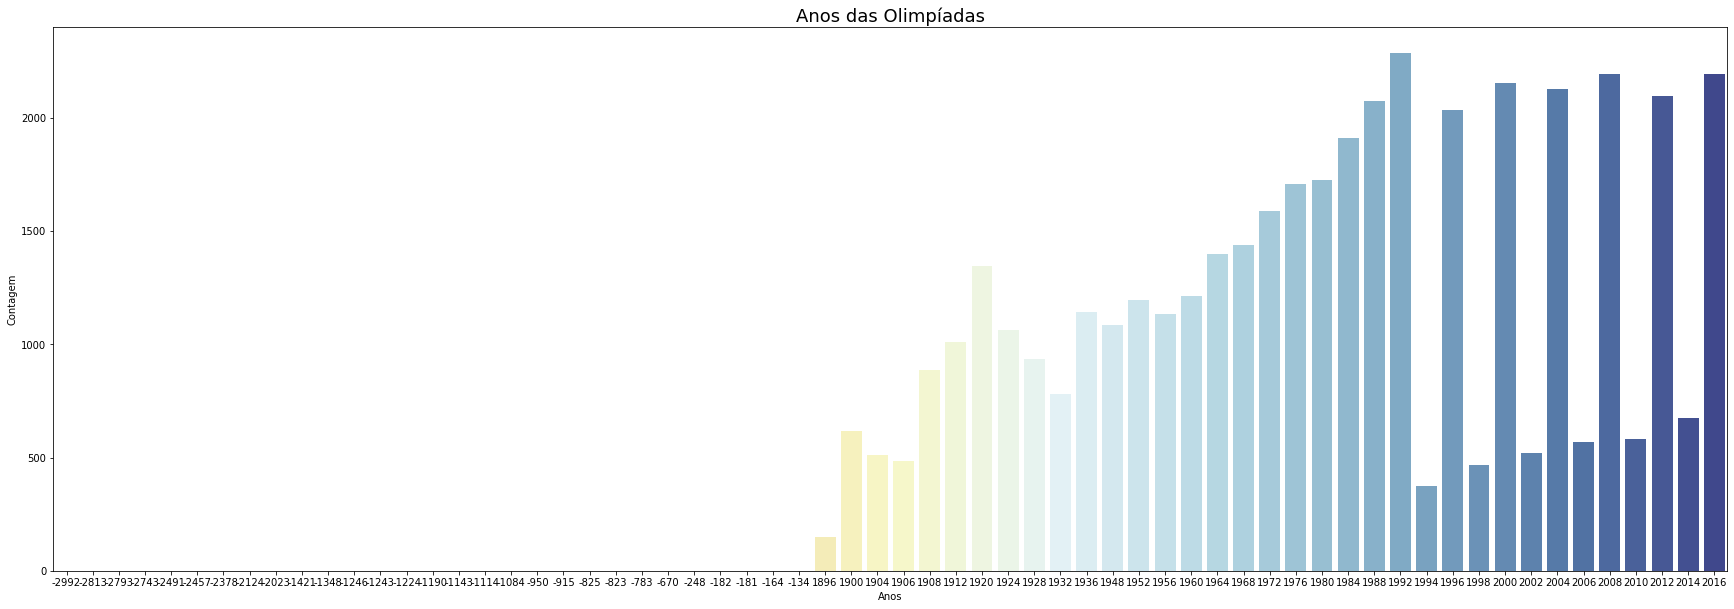

In [23]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'Year', data = jogos, palette = "RdYlBu") 
plt.xlabel("Anos")
plt.ylabel("Contagem")
plt.title("Anos das Olimpíadas", fontsize=18)
plt.show()

É notável que os anos inferiores a 1896 estão incorretos, até por que este foi o ano em que surgiram os jogos olímpicos. Vamos retirá-los

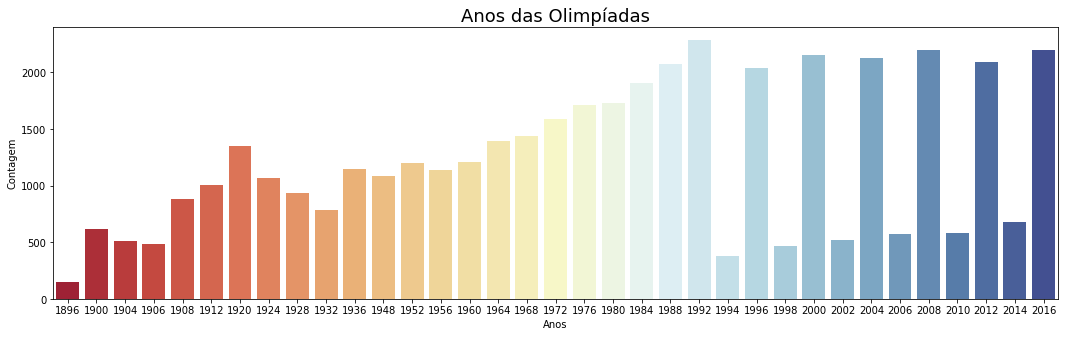

In [24]:
jogos = jogos[jogos['Year'] >= 1896]

#vamos plotar novamente o gráfico e ver o que mudou
plt.figure(figsize=(18,5))
sns.countplot(x = 'Year', data = jogos, palette = "RdYlBu") 
plt.xlabel("Anos")
plt.ylabel("Contagem")
plt.title("Anos das Olimpíadas", fontsize=18)
plt.show()

Podemos perceber uma discrepância entre os anos inferiores a 1994 com seus superiores. Isso ocorre, pois a partir de 1994, os jogos de Verão e Inverno foram colocados em alternância aos anos pares, o que não acontecia antes.





###Coluna "Height":

Para encontrar os outliers dessa categoria, um gráfico comum seria o boxplot. Contudo, podemos ver abaixo o que ocorre nesse caso, já que os outliers possuem valores extremamente discrepantes, o gáfico fica ilegível

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


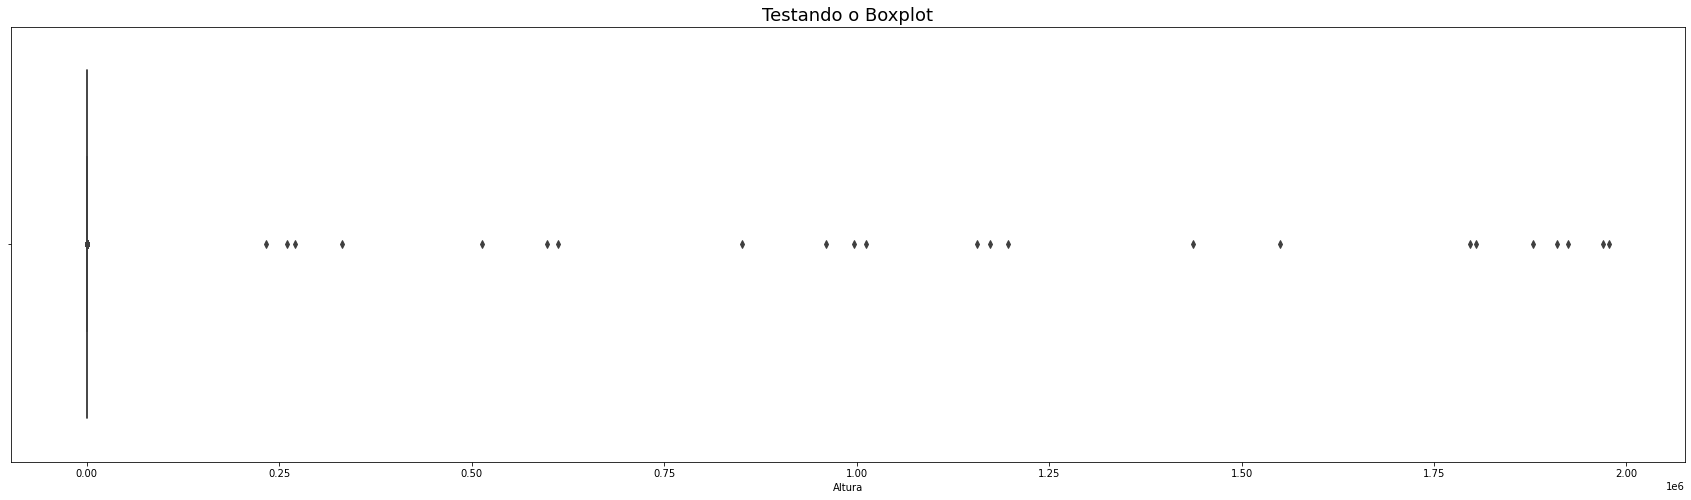

In [25]:
plt.figure(figsize=(30,8))
sns.boxplot( jogos["Height"])
plt.title("Testando o Boxplot", fontsize=18)
plt.xlabel("Altura")
plt.show()

Assim, vamos visualizar esse dado divindindo-o em duas tabelas, de modo que poderemos ver o que ocorre com alturas muito grandes e muito pequenas.

Analisando primeiro alturas acima de 210cm:

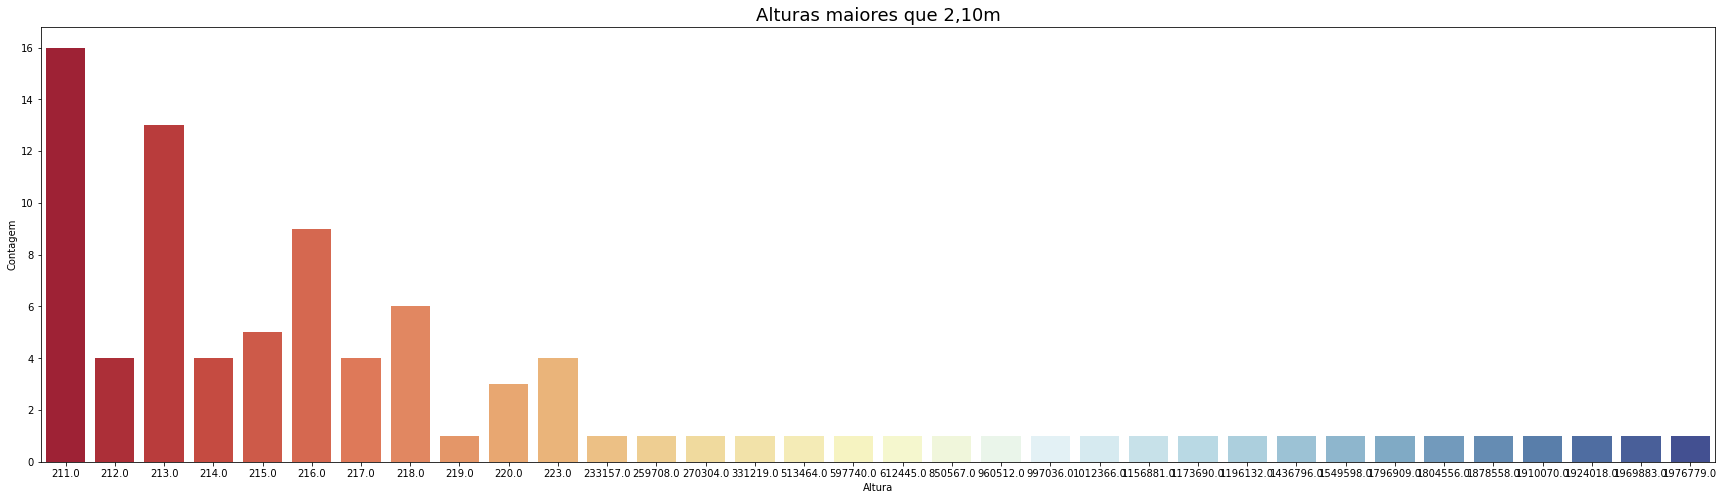

In [26]:
plt.figure(figsize=(30,8))
sns.countplot(x = "Height", data = jogos[jogos["Height"] > 210], palette = "RdYlBu")
plt.xlabel("Altura")
plt.ylabel("Contagem")
plt.title("Alturas maiores que 2,10m", fontsize=18)
plt.show()

Há um salto muito grande de 223cm (que é uma altura possível) para 233157, de modo que todos os valores acima disso devem ser retirados.

Para alturas menores que 160cm:

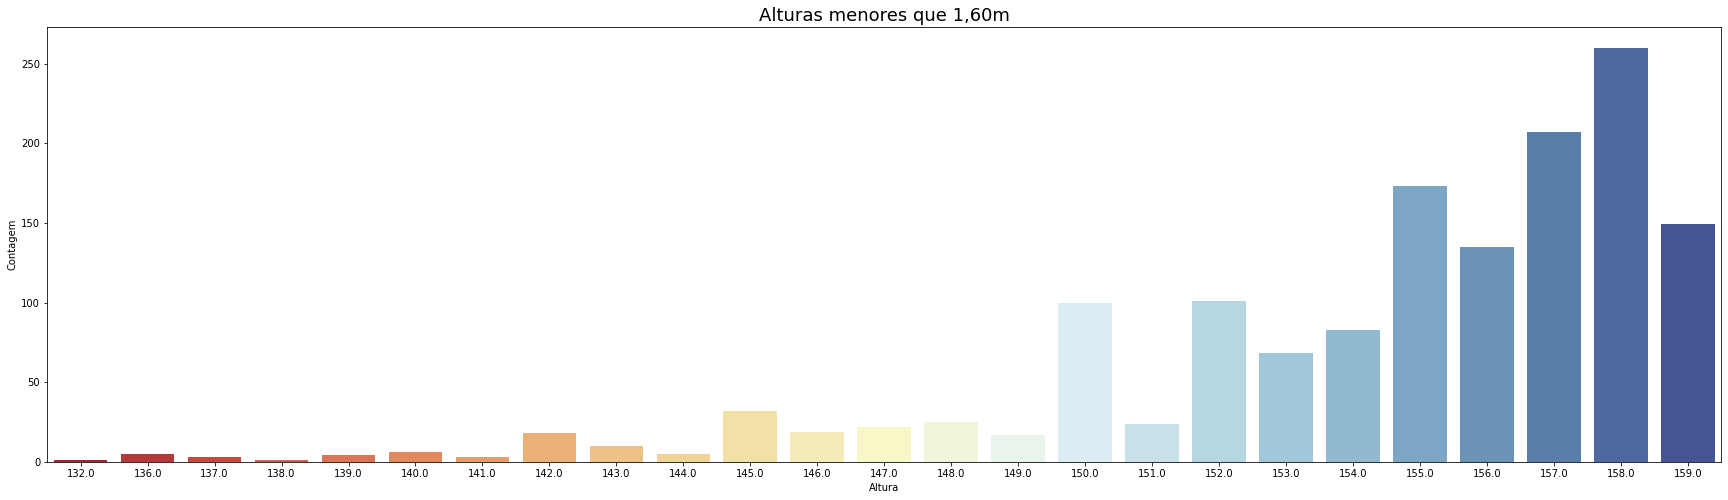

In [27]:
plt.figure(figsize=(30,8))
sns.countplot(x = "Height", data = jogos[jogos["Height"] < 160], palette = "RdYlBu")
plt.xlabel("Altura")
plt.ylabel("Contagem")
plt.title("Alturas menores que 1,60m", fontsize=18)
plt.show()

Apesar de haverem algumas alturas muito pequenas, não vamos retirá-las, já que seus valores são possíveis e existem poucos dados.

Arrumando então os dados de altura:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


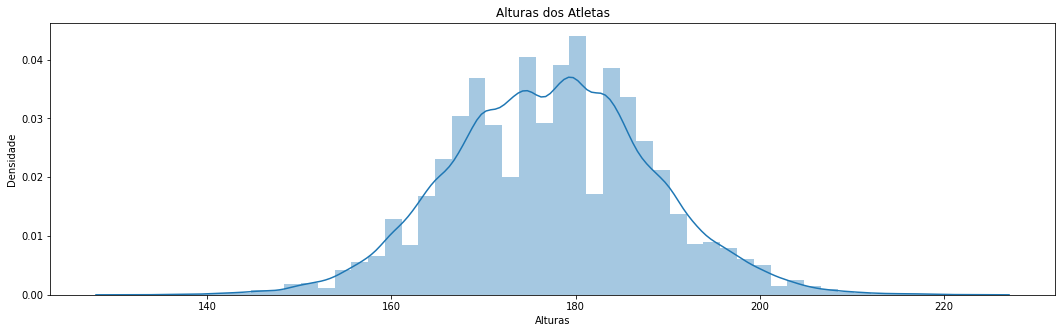

In [28]:
jogos = jogos[jogos['Height'] <= 223]

#vamos plotar novamente o gráfico e ver o que mudou
plt.figure(figsize=(18,5))
sns.distplot(x=jogos['Height'])
plt.xlabel("Alturas")
plt.ylabel("Densidade")
plt.title('Alturas dos Atletas')
plt.show()

#Análise de Dados


##Participação mulheres vs homens

Text(0.5, 1.0, 'Sexos nas Olimpíadas')

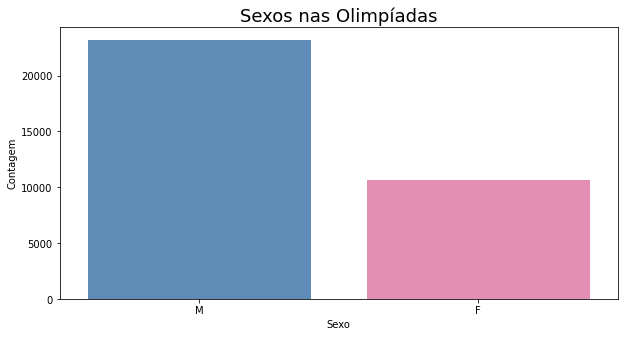

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Sex', data = jogos, palette={"M": "#518cc4", "F": "#f280b2"}) 
plt.xlabel("Sexo")
plt.ylabel("Contagem")
plt.title("Sexos nas Olimpíadas", fontsize=18)

É possível percebermos claramente a maior quantidade de homens nos jogos olímpicos. Para termos uma melhor visualização, vamos ver o que ocorreu ao longo dos anos:

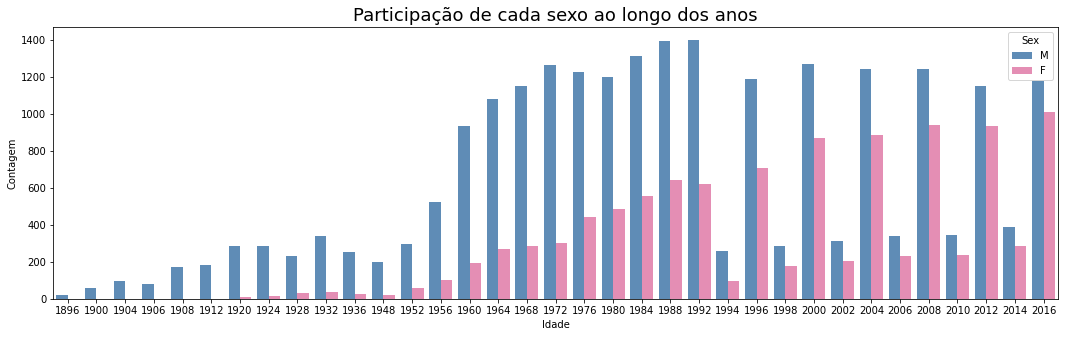

In [30]:
plt.figure(figsize=(18,5))
sns.countplot(x = 'Year', hue="Sex", data = jogos, palette={"M": "#518cc4", "F": "#f280b2"}) 
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.title("Participação de cada sexo ao longo dos anos", fontsize=18)
plt.show()

Apesar de o número de homens ser maior que o de mulheres, a diferença entre os dois sexos vem ficando cada vez menor. Contudo, não podemos tirar nenhuma conclusão, já que não sabemos o motivo dessa diferença.

##Top 5 jogos femininos e masculinos:

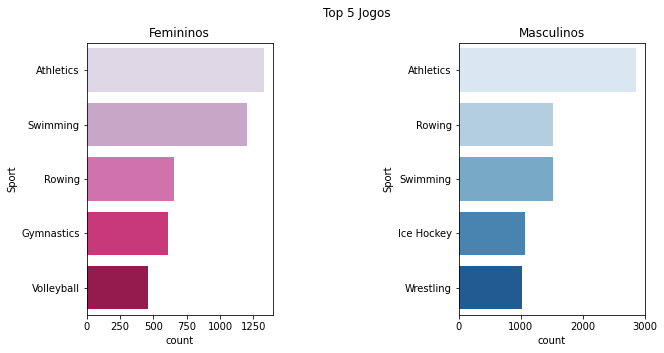

In [31]:
mulheres = jogos[jogos["Sex"] == "F"]
homens = jogos[jogos["Sex"] == "M"]

fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Top 5 Jogos')
plt.subplots_adjust(wspace=1)

ax[0].set_title('Femininos')
sns.countplot(ax = ax[0], y = "Sport", data = mulheres, palette = "PuRd",
              order=mulheres["Sport"].value_counts().index[:5])

ax[1].set_title('Masculinos')
sns.countplot(ax = ax[1], y = "Sport", data = homens, palette = "Blues",
              order=homens["Sport"].value_counts().index[:5])


plt.show()

"Athletics" é o jogo que mais aparece nas duas categorias. Além disso, há uma participação grande das mulheres em jogos como ginástica e volley, enquanto os homens possuem presença em hockey no gelo e luta.

Temos abaixo uma visão mais geral dos jogos:

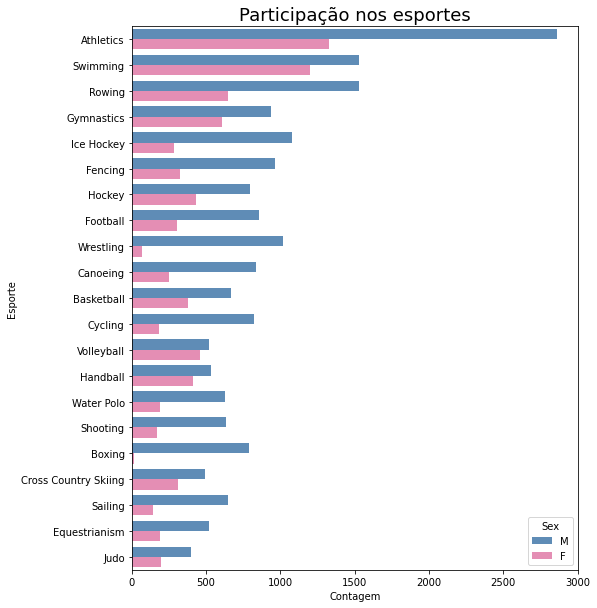

In [32]:
plt.figure(figsize = (8,10))
sns.countplot(y = "Sport", hue = "Sex", data = jogos, palette={"M": "#518cc4", "F": "#f280b2"},order=jogos["Sport"].value_counts().index)
plt.ylim(20.5)
plt.xlabel("Contagem")
plt.ylabel("Esporte")
plt.title("Participação nos esportes", fontsize=18)
plt.show()

###Distribuição de idades nos top 5 jogos:

Separando apenas os dados referentes aos 5 top jogos de cada sexo, temos:

In [33]:
top5_mulheres = mulheres["Sport"].value_counts(sort=True).index[:5]
top5_mulheres = mulheres[mulheres["Sport"].isin(top5_mulheres)]

top5_homens = homens["Sport"].value_counts(sort=True).index[:5]
top5_homens = homens[homens["Sport"].isin(top5_homens)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


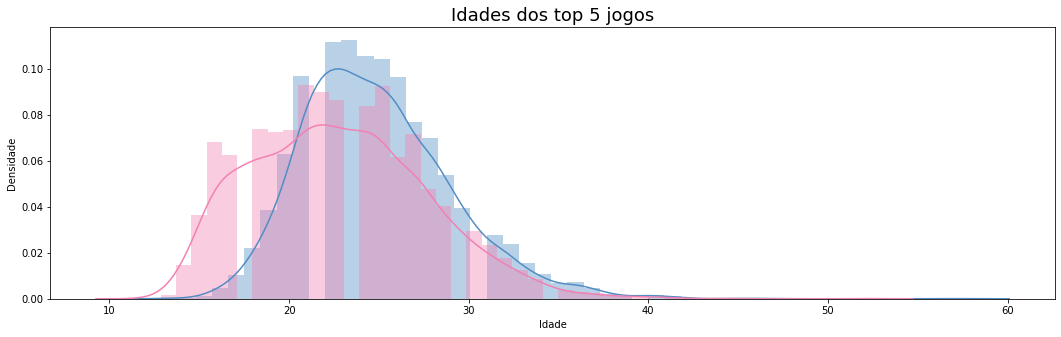

In [34]:

plt.figure(figsize=(18,5))
sns.distplot(top5_homens["Age"], color = "#518cc4") 
sns.distplot(top5_mulheres["Age"], color = "#f280b2")
plt.xlabel("Idade")
plt.ylabel("Densidade")
plt.title("Idades dos top 5 jogos", fontsize=18) 
plt.show()

O gráfico acima nos mostra que existem números maiores de mulheres mais novas participando das Olimpíadas do que homens. Isso pode ser explicado já que esportes como a ginástica, que possuem grande participação feminina, requerem uma faixa etária de competidoras muito mais novas do que outros esportes.

##Medalhas por país

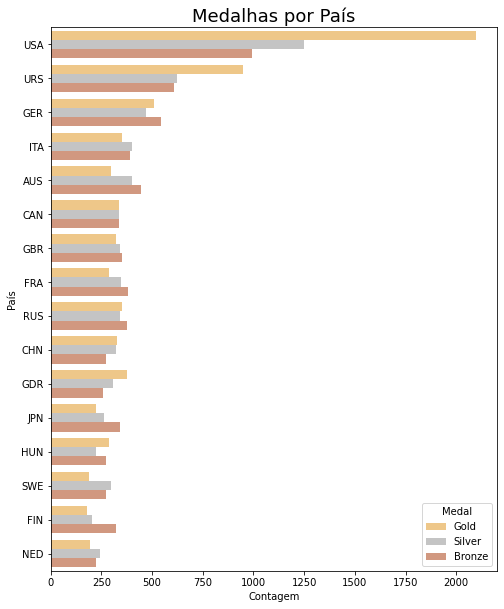

In [35]:
plt.figure(figsize = (8,10))
sns.countplot(y = "NOC", hue = "Medal", data = jogos, hue_order = ["Gold", "Silver", "Bronze"], 
              palette = {"Gold": "#ffcb78", "Silver": "#c4c4c4", "Bronze": "#de9273"}, 
              order=jogos["NOC"].value_counts().index)
plt.ylim(15.5)
plt.xlabel("Contagem")
plt.ylabel("País")
plt.title("Medalhas por País", fontsize=18)
plt.show()

Há um destaque muito grande para o número de medalhas acumuladas ao longo dos anos pelos Estados Unidos, principalmente as de ouro.

###Jogos de Verão vs Inverno

Por se tratarem de jogos completmante diferentes, é importante a análise dos jogos de Verão e Inverno separadamente

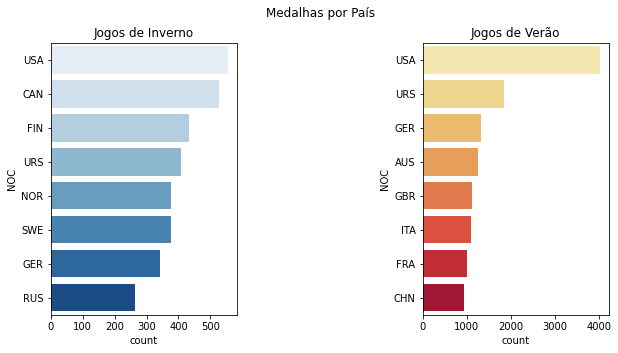

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Medalhas por País')
plt.subplots_adjust(wspace=1)

ax[0].set_title('Jogos de Inverno')
sns.countplot(ax = ax[0], y = "NOC", data = jogos[jogos["Season"] == "Winter"], palette="Blues", 
              order=jogos[jogos["Season"] == "Winter"]["NOC"].value_counts().index[:8])

ax[1].set_title('Jogos de Verão')
sns.countplot(ax = ax[1], y = "NOC", data = jogos[jogos["Season"] == "Summer"], palette="YlOrRd",
              order=jogos[jogos["Season"] == "Summer"]["NOC"].value_counts().index[:8])


plt.show()


O único país que permanece em destaque em ambas as Olimpíadas é os Estados Unidos. Já os outros são completamente diferentes, e podemos perceber que na de inverno, se destacam países com essa estação forte e culturas que valorizam os jogos nela praticados.

##Competidores com mais medalhas

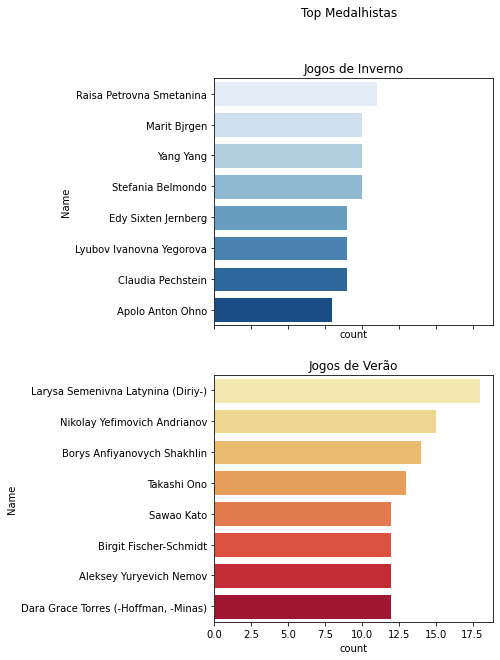

In [37]:
fig, ax = plt.subplots(2, sharex=True, figsize=(5,10))
fig.suptitle('Top Medalhistas')
sns.set_style("whitegrid")

ax[0].set_title('Jogos de Inverno')
sns.countplot(ax = ax[0], y = "Name", data = jogos[jogos["Season"] == "Winter"], palette="Blues", 
              order=jogos[jogos["Season"] == "Winter"]["Name"].value_counts().index[:8])

ax[1].set_title('Jogos de Verão')
sns.countplot(ax = ax[1], y = "Name", data = jogos[jogos["Season"] == "Summer"], palette="YlOrRd", 
              order=jogos[jogos["Season"] == "Summer"]["Name"].value_counts().index[:8])


plt.show()

#Conclusão

Com esse projeto, foi possível colocar em prática os conceitos aprendidos nas aulas do Turing Academy de limpeza e análise de dados, de modo que se tornaram possíveis as diversas análises acerca dos jogos olímpicos. Ao comparar algumas métricas interessantes, sejam elas entre os sexos, seus respectivos jogos, ou até mesmo entre as modalidades de Inverno e Verão e os países com mais medalhas, o entendimento desse dataset se tornou eminente.